## Проверка  сходимости в центральной  предельной теореме

### Загружаем необходимые пакеты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Генерируем экспоненциально распределенные случайые величины с параметром lambda = 0.1

In [76]:
lambda_1 = 0.1
exp_rv = sts.expon(scale = 1.0/lambda_1)

In [115]:
# simulate 1000 rv 
np.random.seed(35435)
exp_sample = exp_rv.rvs(size=1000)

### Строим гистограмму( эмпирическую плотность) и реальную плотность симулированной величины 

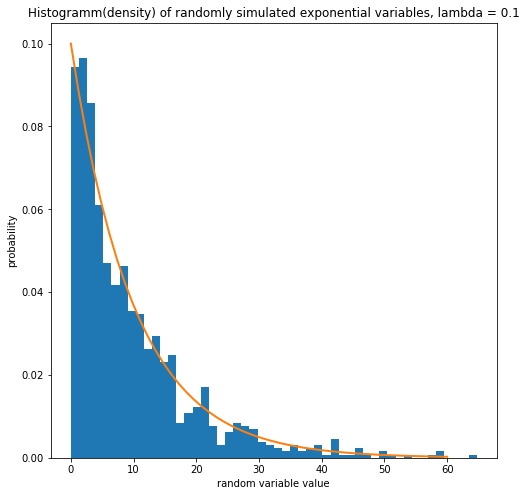

In [123]:
fig = plt.figure(figsize=(8,8))
myHist = plt.hist(exp_sample, 50, normed=True)
x = np.linspace(0,60) 
h = plt.plot(x, exp_rv.pdf(x), lw=2)
plt.xlabel('random variable value')
plt.ylabel('probability')
plt.title('Histogramm(density) of randomly simulated exponential variables, lambda = 0.1')
plt.show()

### Создаем матрицу средних:  
####  на каждом мемте матрицы среднее значение случайной выборки размера 5, 10 и 100 (по столбцам)  из экспоненциального распределения с прарметром 0.1   
##### ( то есть в каждом столбце рассматрваются выборки одного размера) 

In [117]:
n = [5,20, 100]
size = (1000, len(n))
matr = np.zeros(size)
np.random.seed(23)
for i in range( 1000):
    for j in range( len(n)):
        random_vec_tmp =  exp_rv.rvs(size= n[j])
        matr[i,j] = np.mean( random_vec_tmp )
print matr[0:10, :]

[[ 11.39376265  10.5192227    9.05873383]
 [  9.95522309  12.08622985   9.68745078]
 [  7.19021867   6.93715468   9.58754387]
 [  1.72605186   9.22269485   8.32862046]
 [ 10.39850047   7.23908405   8.83598602]
 [  6.40859863  15.05184235   8.51303658]
 [ 10.10436873   9.50838113  11.68821627]
 [  6.66761668  11.32218842   8.98454633]
 [ 17.1851404    9.62380549  10.73636733]
 [  7.25236056   8.89605475   9.94992706]]


###  По центральной предельной теореме среднее значение независимых одинаково распределенных величин сходится к нормальному по распределению 
#### Распределение среднего: X_mean ~ N ( EX1 , DX1 / n ) 
#### Для экспоненциально - распределенных величин EX1 = 1/ lambda, DX1  =   1/ lambda^2

In [111]:
# theoretical normal density:
mu = [ 1.0/lambda_1 ]*3
sd =  np.sqrt((1.0/lambda_1)**2 / np.array(n))
print mu 
print sd

[10.0, 10.0, 10.0]
[ 4.47213595  2.23606798  1.        ]


In [ ]:
# theoretical normal density:
mu = [ 1.0/lambda_1 ]*3
sd =  np.sqrt((1.0/lambda_1)**2 / np.array(n))
print mu 
print sd

### Cтроим гистограммы распределения среднего для разных размеров выборок( столбцов матрицы средних).  Линия показывает плотность нормального распределения стеоретическими  параметрами соответтвующими средним экспоненциальных величин (посчитаны выше).


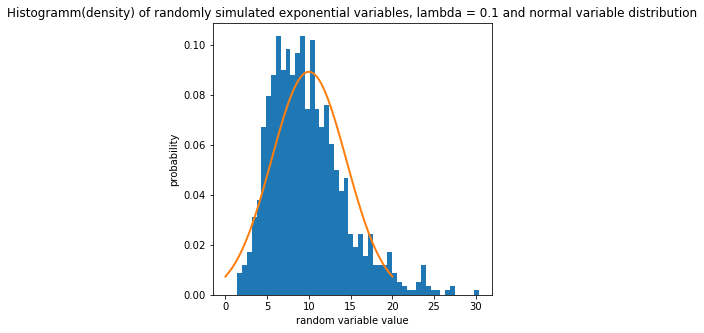

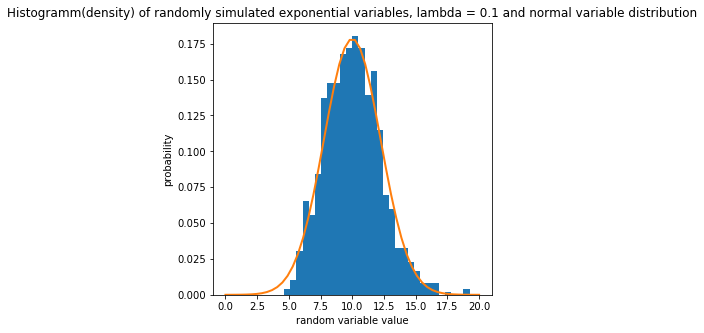

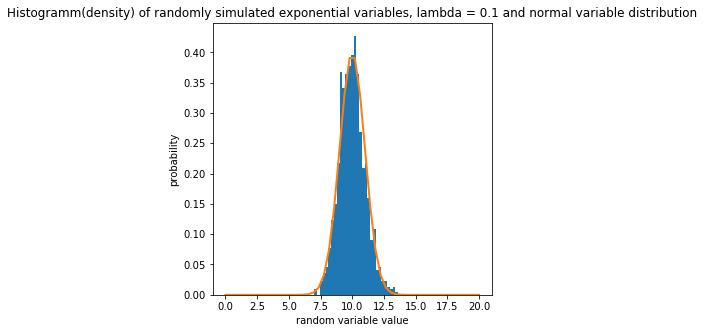

In [121]:
fig = plt.figure(figsize=(5,5))
hist_1 = plt.hist( matr[:,0], 50, normed=True)
x = np.linspace(0,20) 
norm_rv = sts.norm(loc = mu[0] , scale = sd[0])
h = plt.plot(x, norm_rv.pdf(x), lw=2)
plt.xlabel('random variable value')
plt.ylabel('probability')
plt.title('Histogramm(density) of randomly simulated exponential variables, lambda = 0.1 and normal variable distribution')
plt.show()

fig = plt.figure(figsize=(5,5))
hist_1 = plt.hist( matr[:,1], 30, normed=True)
x = np.linspace(0,20) 
norm_rv = sts.norm(loc = mu[1] , scale = sd[1])
h = plt.plot(x, norm_rv.pdf(x), lw=2)
plt.xlabel('random variable value')
plt.ylabel('probability')
plt.title('Histogramm(density) of randomly simulated exponential variables, lambda = 0.1 and normal variable distribution')
plt.show()

fig = plt.figure(figsize=(5,5))
hist_1 = plt.hist( matr[:,2], 30, normed=True)
x = np.linspace(0,20) 
norm_rv = sts.norm(loc = mu[2] , scale = sd[2])
h = plt.plot(x, norm_rv.pdf(x), lw=2)
plt.xlabel('random variable value')
plt.ylabel('probability')
plt.title('Histogramm(density) of randomly simulated exponential variables, lambda = 0.1 and normal variable distribution')
plt.show()

## Выводы: 
## Из проведенного эксперимента видно, что сгенерированные средние выборок из экспоненциальных величин действительно  хорошо описываются нормальным распределениес с соответствующими параметрами.  Причем с ростом n - объема выборки качество аппроксимации увеличивается. (что видно из гистограпммы) 


### Комментарий: для оценки скорости сходимости  выборочных средних обычно пользуются теоремой Берри - Эссена. 
